In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [2]:
from Data.Data_Module import Data_Module
from Models.Printed_Tex_Transformer import ResNetTransformer
from Lightning_Models.Printed_Tex_Lit_Model import LitResNetTransformer
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning import Trainer
from PIL import Image
import torch
from pytorch_lightning.loggers import TensorBoardLogger
from torchvision import transforms
from PIL import Image
from IPython.display import display, Math

dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [14]:
# Generate Data Module by uploading images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt

dataset = Data_Module(stage = 'fit',
                 set_max_label_length = 128,
                 number_png_images_to_use_in_dataset=250*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.999,
                   vocabulary_path = 'Data/Data_Bank/230k.json',
                load_vocabulary = True,
                      image_padding = True,


                 batch_size = 128,
                num_workers = 8,
                data_on_gpu = True,
                )


In [4]:
print( 
    'Vocabulary size:',len(dataset.vocabulary),
    '\nMax label length:', dataset.max_label_length,
    "\nStart <S> goes to index ",dataset.vocabulary['<S>'],
      "\nEnd <E> goes to index ",dataset.vocabulary['<E>'],
      "\nPadding <P> goes to index ",dataset.vocabulary['<P>'],
)

Vocabulary size: 579 
Max label length: 130 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [5]:
model = ResNetTransformer(dataset=dataset).to(dev)

/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/gregory/opt/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [6]:
model.load_state_dict(torch.load(("Models_Parameters_Log/Printed1_inverted.pth"), map_location=torch.device('cpu')))


<All keys matched successfully>

In [7]:
import cv2
import PIL
import numpy as np
transform = transforms.ToPILImage()
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = dataset.vocabulary
    inverse_mapping =dataset.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s +" " + str(letter)
    return s

424


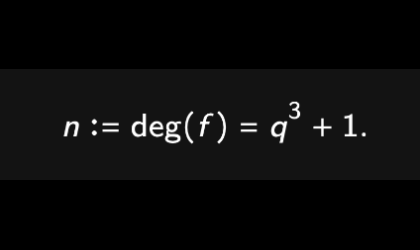

None

Predicted formula:
 <S> \begin{array} { l l l } { m } & { { } & { } \\ { } & { } & { } & { } \\ { } & { } & { } & { } & { } \\ { } & { } & { } & { } & { } \\ { } & { } & { } & { } & { } & { } \\ { } & { } & { } & { } & { } & { } & { } & { } & { } & { } \\ { } & { } & { } & { } & { } & { } & { } & {


<IPython.core.display.Math object>

None


In [22]:
### ALB
my_image_path= "Jupyter_Notebooks/test_photos/my_image.png"
#my_image = Image.open(my_image_path).convert("L") 

my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)
h,w,c = my_image.shape
print(w)
my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))


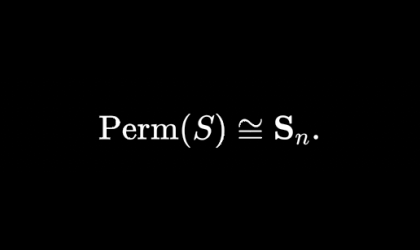

None

Predicted formula:
 <S> { \bf D } { \bf G T r } { \bf D } { \bf D } { \bf S } { \bf S } { \bf S } { \bf S } _ { { { \bf H } } } <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [9]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/zarhin.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)

my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image'][:1]
print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

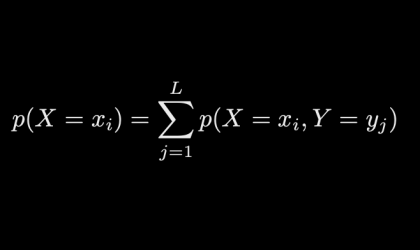

None

Predicted formula:
 <S> { \cal D } \Bigl ( X \, \equiv \, { \cal Z } _ { t } \Bigr ) \equiv \sum _ { j = 1 } ^ { L } { \cal D } \Bigl ( X \, \equiv \, x _ { i } ; Y \, \equiv \, g _ { j } \Bigr ) <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [10]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/screenshot_1.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)

my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']#[:1]
print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

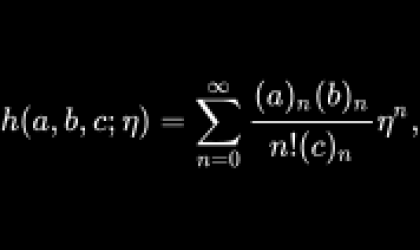

None

Predicted formula:
 <S> h \{ a , b , c _ { \uparrow } ^ { * } \eta \} = \sum _ { n = 0 } ^ { \infty } \frac { \{ a \} _ { n } \{ b \} _ { n } } { \eta ! ( c \} _ { n } } \eta ^ { n } , <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [11]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/0a0df4c4229b725.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)

my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']#[:1]
print(display(transform(my_image_tensor)))

print('\nPredicted formula:')
with torch.no_grad():
    model.eval()
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

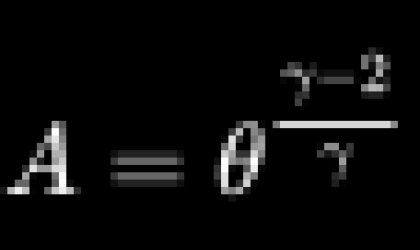

None

Predicted formula:
 <S> { \bf Z } _ { \pm } = \prod _ { 0 } { \bf Z } ^ { \frac { \mathrm { a { { { { { } } } } { { { { { { } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } } <E> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P> <P>


<IPython.core.display.Math object>

None


In [12]:
### ALB

my_image_path= "Jupyter_Notebooks/test_photos/0a0ebebfb1f6ab3.png"
#my_image = Image.open(my_image_path).convert("L") 
my_image = cv2.imread(my_image_path)
my_image =  cv2.cvtColor(my_image, cv2.COLOR_BGR2RGB)
my_image= cv2.bitwise_not(my_image)
#my_image = PIL.ImageOps.invert(my_image)

my_image_tensor = dataset.image_transform_test(image=np.array(my_image))['image']#[:1]
print(display(transform(my_image_tensor)))
model.eval()
print('\nPredicted formula:')
with torch.no_grad():
    my_prediction =  model.predict(my_image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(my_prediction))
print(display(Math(token_to_strings(my_prediction))))

In [13]:
# DISREGARD this uses wrong transformations

# Get image and label from train data -- change number for different ones
image_tensor, label = dataset.data_train[12]
transform = transforms.ToPILImage()
image = transform(image_tensor)

print('\nOriginal image and formula:')
display(image)
print(token_to_strings(label))
print('\nPredicted formula: \n')
with torch.no_grad():
    model.eval()
    prediction =  model.predict(image_tensor.unsqueeze(0).to(dev))
print(token_to_strings(prediction),'\n')
print(display(Math(token_to_strings(prediction))))

AttributeError: 'Data_Module' object has no attribute 'data_train'